# Defining Variables

## General Constants

In [1]:
%matplotlib widget
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
G = 6.67e-11

In [2]:
m_1 = 2e30
m_2 = 4e30
gmm = G*m_1*m_2
AU = 1.5e11
daysec = 24*60*60
dt = 0.01 * daysec
t =0
print(gmm)

5.336e+50


## Object 1 Variables

In [3]:
xlist1 = []
ylist1= []
zlist1= []
x1 = 0
y1 = 0
z1 = 0
# xlist1.append(x1)
# ylist1.append(y1)
# zlist1.append(z1)
vx1 = 0
vy1 = 0
vz1 = 0
print(xlist1)


[]


## Object 2 Variables

In [4]:
xlist2 = []
ylist2 = []
zlist2= []
x2 = 1 * AU
y2 = 0
z2 = 0
# xlist2.append(x2)
# ylist2.append(y2)
# zlist2.append(z2)
vx2 = 0
vy2 = 10000
vz2 = 0
print(xlist2)

[]


## Gravitational Force

In [5]:
while t < 500 * daysec:
    rx = x2 - x1
    ry = y2 - y1
    rz = z2 - z1
    absr3 = (rx**2 + ry**2+ rz**2)**1.5
    fx = (gmm*rx)/absr3 
    fy = (gmm*ry)/absr3
    fz = (gmm*rz)/absr3
    # For Body 1
    vx1 += (fx*dt)/m_1
    vy1 += (fy*dt)/m_1
    vz1 += (fz*dt)/m_1
    # For Body 2
    vx2 -= (fx*dt)/m_2
    vy2 -= (fy*dt)/m_2
    vz2 -= (fz*dt)/m_2
    # Updating the coordinates for Body 1
    x1 += vx1*dt
    y1 += vy1*dt
    z1 += vz1*dt
    # Updating the coordinates for Body 2
    x2 += vx2*dt
    y2 += vy2*dt
    z2 += vz2*dt
    # Updating time
    t += dt
    # Update the coordinates
    xlist1.append(x1)
    ylist1.append(y1)
    zlist1.append(z1)
    xlist2.append(x2)
    ylist2.append(y2)
    zlist2.append(z2)


In [6]:
# print(xlist1)
# print(xlist2)
# plt.plot(xlist1,ylist1)
# plt.plot(xlist2,ylist2)
# plt.show()

[8851.783680000002, 26555.35256302954, 53110.70965109696, 88517.85942519212, 132776.80784529058, 185887.562350359, 247850.131858362, 318664.5267662704, 398330.75895007065, 486848.84176477586, 584218.790044438, 690440.6201021614, 805514.3497301182, 929439.9981995639, 1062217.5862608561, 1203847.1361434725, 1354328.6715560318, 1513662.2176863155, 1681847.8012012916, 1858885.4502471378, 2044775.1944492683, 2239517.0649123606, 2443111.0942203845, 2655557.316436632, 2876855.767103748, 3107006.483243763, 3346009.5033581285, 3593864.86742775, 3850572.616913026, 4116132.7947538854, 4390545.445369826, 4673810.614659955, 4965928.350003034, 5266898.70025752, 5576721.715761611, 5895397.448333292, 6222925.951270384, 6559307.279350589, 6904541.488831547, 7258628.637450881, 7621568.784426254, 7993361.990455422, 8374008.317716289, 8763507.829866968, 9161860.592045834, 9569066.67087159, 9985126.13444332, 10410039.05234056, 10843805.495623358, 11286425.536832338, 11737899.24998877, 12198226.710594635, 1

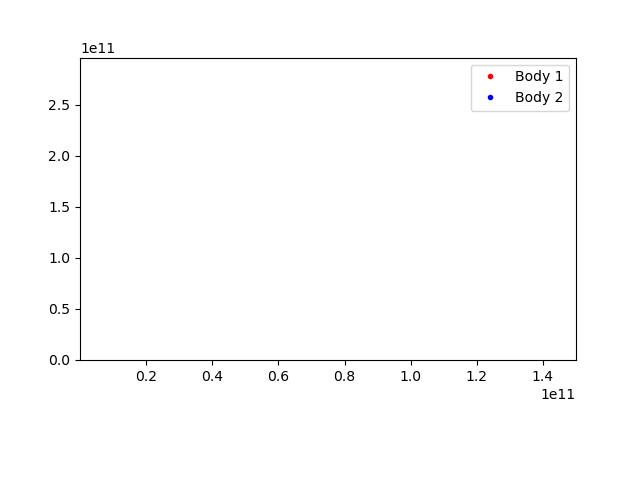

In [7]:
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)

padding = 5  # Adjust padding to your preference
x_min = min(min(xlist1), min(xlist2)) - padding
x_max = max(max(xlist1), max(xlist2)) + padding
y_min = min(min(ylist1), min(ylist2)) - padding
y_max = max(max(ylist1), max(ylist2)) + padding
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
# Define the step size and the length of the trails
step_size = 60  # Increase step size to speed up the animation

# Scatter plots for trails
trail1, = ax.plot([], [], 'ro', label='Body 1', markersize=3)  # Red dots for Body 1 trail
trail2, = ax.plot([], [], 'bo', label='Body 2', markersize=3)  # Blue dots for Body 2 trail
current1, = ax.plot([], [], 'ro',  markersize=10)  # Larger dot for current position of Body 1
current2, = ax.plot([], [], 'bo',  markersize=10)  # Larger dot for current position of Body 2

def animate(i):
    index = i * step_size
    # Update the trail points by adding the current point
    xdata1 = xlist1[:index:step_size]
    ydata1 = ylist1[:index:step_size]
    xdata2 = xlist2[:index:step_size]
    ydata2 = ylist2[:index:step_size]

    # Set data for the trails
    trail1.set_data(xdata1, ydata1)
    trail2.set_data(xdata2, ydata2)
    # Set data for the current positions
    current1.set_data([xlist1[index]], [ylist1[index]])
    current2.set_data([xlist2[index]], [ylist2[index]])
    return trail1, trail2, current1, current2

# Calculate total frames considering step size
total_frames = (len(xlist1) + step_size - 1) // step_size

# Creating the animation
ani = FuncAnimation(fig, animate, frames=total_frames, interval=10, blit=True, repeat=False)
print(xlist1)
plt.legend()
plt.show()

/var/folders/kw/p6dm6cw517vcz0jm5nq2zznr0000gn/T/ipykernel_4560/2672994900.py:11: UserWarning: Attempting to set identical low and high zlims makes transformation singular; automatically expanding.
  ax.set_zlim3d([min(zlist1+zlist2), max(zlist1+zlist2)])


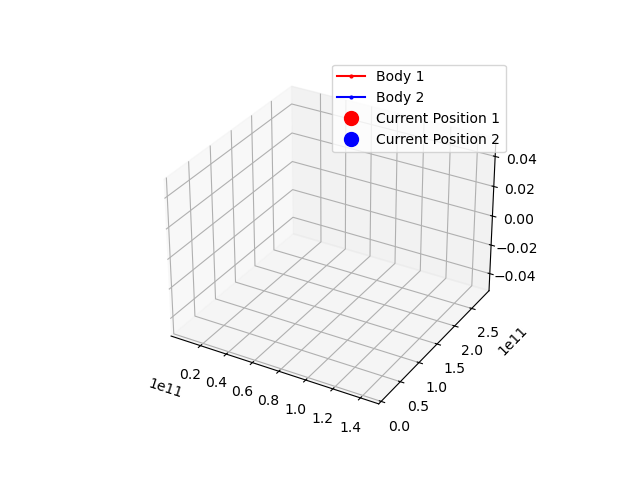

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
trail1, = ax.plot([], [], [], 'ro-', label='Body 1', markersize=2)  # Red line for Body 1 trail
trail2, = ax.plot([], [], [], 'bo-', label='Body 2', markersize=2)  # Blue line for Body 2 trail
current1, = ax.plot([], [], [], 'ro', label='Current Position 1', markersize=10)  # Larger dot for current position of Body 1
current2, = ax.plot([], [], [], 'bo', label='Current Position 2', markersize=10)  # Larger dot for current position of Body 2

# Setting the axes properties
ax.set_xlim3d([min(xlist1+xlist2), max(xlist1+xlist2)])
ax.set_ylim3d([min(ylist1+ylist2), max(ylist1+ylist2)])
ax.set_zlim3d([min(zlist1+zlist2), max(zlist1+zlist2)])

step_size = 95 # Controls how many frames to skip for each update to increase speed

def update(num):
    # Calculate the current index considering the step size
    index = num * step_size
    if index >= len(xlist1):
        index = len(xlist1) - 1  # Ensure the index does not go out of bounds

    # Trail update with step size for smoother trailing effect
    trail1.set_data(xlist1[:index], ylist1[:index])
    trail1.set_3d_properties(zlist1[:index])
    trail2.set_data(xlist2[:index], ylist2[:index])
    trail2.set_3d_properties(zlist2[:index])
    # Current position update
    current1.set_data([xlist1[index]], [ylist1[index]])
    current1.set_3d_properties([zlist1[index]])
    current2.set_data([xlist2[index]], [ylist2[index]])
    current2.set_3d_properties([zlist2[index]])
    return trail1, trail2, current1, current2

total_frames = (len(xlist1) + step_size - 1) // step_size

ani = FuncAnimation(fig, update, frames=total_frames, interval=50, blit=False)

plt.legend()
plt.show()